# Описание проекта:
**Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.**


# Описание данных games.csv
**Name** — название игры\
**Platform** — платформа\
**Year_of_Release** — год выпуска\
**Genre** — жанр игры\
**NA_sales** — продажи в Северной Америке (миллионы долларов)\
**EU_sales** — продажи в Европе (миллионы долларов)\
**JP_sales** — продажи в Японии (миллионы долларов)\
**Other_sales** — продажи в других странах (миллионы долларов)\
**Critic_Score** — оценка критиков (от 0 до 100)\
**User_Score** — оценка пользователей (от 0 до 10)\
**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.\

*Данные за 2016 год могут быть неполными.

## План работы:

* ### Шаг 1. Откроем файл с данными и изучим общую информацию

Путь к файлу: /datasets/games.csv.

* ### Шаг 2. Подготовим данные

    + Заменим названия столбцов (приведем к нижнему регистру);
    + Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;
    + Обработаем пропуски при необходимости:
        + Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
        + Опишем причины, которые могли привести к пропускам;
        + Обратим внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберем это значение и опишем, как его обработать;
    + Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

* ### Шаг 3. Проведем исследовательский анализ данных

    + Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    + Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    + Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы.
    + Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
    + Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
    + Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы. Соотнесем выводы с продажами игр на других платформах.
    + Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

* ### Шаг 4. Составим портрет пользователя каждого региона
    + Определим для пользователя каждого региона (NA, EU, JP):
        + Самые популярные платформы (топ-5). Опишем различия в долях продаж.
        + Самые популярные жанры (топ-5). Поясним разницу.
        + Влияет ли рейтинг ESRB на продажи в отдельном регионе?

* ### Шаг 5. Провердем исследование статистических показателей

    + Как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения

* ### Шаг 6. Проверим гипотезы

    + Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    + Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.
    
Пороговое значение alpha зададим самостоятельно.
Поясним:
    - Как мы сформулировали нулевую и альтернативную гипотезы;
    - Какой критерий применили для проверки гипотез и почему.

* ### Шаг 7. Напишем общий вывод

**Оформление:** Выполним задание в Jupyter Notebook. Заполним программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Применим форматирование и заголовки.

## Шаг 1: Изучим общую информацию из имеющихся данных 

In [1]:
#Загружаем датасет и подключаем необходимые библиотеки.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats as st
plt.rcParams.update({'figure.max_open_warning': 0})

games = pd.read_csv('/datasets/games.csv')

In [2]:
#Выведем полностью наш датасет.
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
#Посмотрим информацию о нашей таблице. 
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Посмотрим какие столбцы у нас имеются, и все ли с ними впорядке.
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
#Посчитаем количество пустых значений.
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
#Посмотрим на таблицу с пустыми значениями в столбце critic_score.
games[games['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
#Посмотрим на таблицу с пустыми значениями в столбце user_score.
games[games['User_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
#Посмотрим на таблицу с пустыми значениями в столбце rating.
games[games['Rating'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
#Посмотрим на таблицу с пустыми значениями в столбце year_of_release
games[games['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
#Посмотрим какие платформы для игр находятся в арсенале нашего датасета.
games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [11]:
#Посмотрим, какие жанры игр мы имеем, и нет ли у нас повторений.
games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [12]:
#Посчитаем количество дубликатов.
games.duplicated().sum()

0

In [13]:
#В каждом из столбцов 'critic_score', 'user_score', 'rating' недостает почти половины значений:
crit = 8137 / 16715
user = 10014 / 16715
rate = 9949 / 16715
print('Доля пропущенных значений в:\n"critic_score" - {:.1%},\n"user_score" --- {:.1%}, \n"rating" ------- {:.1%}'
      .format(crit, user, rate))


Доля пропущенных значений в:
"critic_score" - 48.7%,
"user_score" --- 59.9%, 
"rating" ------- 59.5%


### Вывод по изучению общей информации:

+ Необходимо привести к правильному типу столбец : Year of Release.
+ Также нужно привести к нижнему регистру столбцы нашей таблицы, а так же сами названия колонок.
+ Имеются пустые значения в столбцах **rating, user_score, critic_score**. Мы можем заменить имеющиеся пустые значения в таблице **year of release**.
+ Дубликатов не имеется.

### Столбцы 'critic_score' и 'user_score'
Крупнейшие платформы, освещающие рынок игр, стали появляться во второй половине 90-х (IGN - 1996, Igromania - 1997, 
Metacritic - 1998). Таким образом, вполне вероятно, что далеко не всем играм, выпущенным до 1996 года, критики ставили оценки.
То же самое справедливо и для столбца 'user_score'. Ведь оценки играм пользователям нужно было где-то размещать в сети.
    Также, так как данные не за полный 2016 год, то и там логично наблюдать пустые значения.
    
### Столбец 'raiting'
Крупнейшая негосударственная организация (ESRB), присуждающая рейтинги играм была основана в 1994 году.
Соответственно, далеко не всем играм, выпущенным до этого года, присуждался рейтинг.

## Шаг 2. Подготовим данные

#### Заменим названия столбцов (приведем к нижнему регистру);

In [14]:
# Заменим названия столбцов (приведем к нижнему регистру) 
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [15]:
# Приведем к нижнему регистру следующие столбцы:
for column in games[['name','platform','genre','rating']]:
    games[column] = games[column].str.lower()

#### Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;

In [16]:
# Изменим тип данных в столбце year_of_release 
games['year_of_release'] = games['year_of_release'].astype('Int64')

In [17]:
#Посмотрим как выглядит теперь наша таблица
games.sample(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2811,lego marvel's avengers,ps4,2016,action,0.26,0.35,0.00,0.12,71.0,7,e10+
4293,country dance 2,wii,2011,misc,0.43,0.00,0.00,0.03,NaN,tbd,e10+
350,resident evil 4,ps2,2005,action,2.08,0.83,0.46,0.25,96.0,8.9,m
9470,drakengard 2,ps2,2005,role-playing,0.06,0.05,0.00,0.02,58.0,5.5,m
2913,infinite undiscovery,x360,2008,role-playing,0.34,0.18,0.12,0.06,68.0,7,t
9691,hisshou pachinko*pachi-slot kouryaku series vo...,ps2,2008,misc,0.00,0.00,0.12,0.00,NaN,NaN,NaN
3826,the golden compass,ps2,2007,action,0.13,0.00,0.00,0.39,46.0,5.2,e10+
8713,mugen souls,ps3,2012,role-playing,0.04,0.02,0.08,0.01,55.0,7.3,t
4939,wipeout 3 the game,wii,2012,action,0.36,0.00,0.00,0.03,NaN,NaN,NaN
14204,hitman: blood money,pc,2006,action,0.00,0.03,0.00,0.01,82.0,8.8,m


In [18]:
# Посчитаем количество пустых значений в столбце year_of_release
games['year_of_release'].isna().sum()

269

In [19]:
# Возьмем одну из 269 игр с неуказанным годом и проверим, выпускалась ли она на других платформах.
games.query('name == "madden nfl 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
1881,madden nfl 2004,xb,2003,sports,1.02,0.02,0.00,0.05,92.0,8.3,e
3889,madden nfl 2004,gc,2003,sports,0.40,0.10,0.00,0.01,94.0,7.7,e
5708,madden nfl 2004,gba,2003,sports,0.22,0.08,0.00,0.01,70.0,6.6,e


In [20]:
# Можно попробовать восполнить пробелы в годах за счет наличия в датасете информации об одних и тех же играх, только выпущенных
# для разных платформ (в надежде, что у какой-то из версий игры будет запись о годе, как это оказалось с игрой "madden nfl 2004").
for i in games[games['year_of_release'].isnull() == True].index:  
    games['year_of_release'][i] = games.loc[games['name'] == games['name'][i], 'year_of_release'].max()

In [21]:
#Посмотрим сколько удалось заполнить пустых значений
games['year_of_release'].isna().sum()

146

#### Обратим внимание на аббревиатуру tbd в столбцах с рейтингом. Отдельно разберем это значение и опишем, как его обработать

Аббревиатура TBD имеет несколько расшифровок. Нас же интересует игровая сфера. 'To Be Determined' - 'Будет определено'.
Т.е. это то же самое, что неизвестное значение. Поэтому, можно смело заменить значение 'tbd' на 'NaN'.

In [22]:
#Заменим tbd на NaN
games['user_score'] = games['user_score'].replace('tbd', np.nan, regex=True)

In [23]:
# Поменяем формат столбца user_score на float
games['user_score'] = games['user_score'].astype(float)
games['user_score'].dtype

dtype('float64')

#### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [24]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [25]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### Вывод по предобработке данных.

Там, где могли, мы заменили пропущенные значения (столбец 'year of release'). Что касается остальных пропусков, для их заполнения у нас недостаточно данных. Поэтому, лучше будем работать с меньшим количеством данных но хорошего качества.
В остальном же, ошибки в данных устранены. Данные подготовлены к дальнейшему анализу.

## Шаг 3. Проведем исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы.

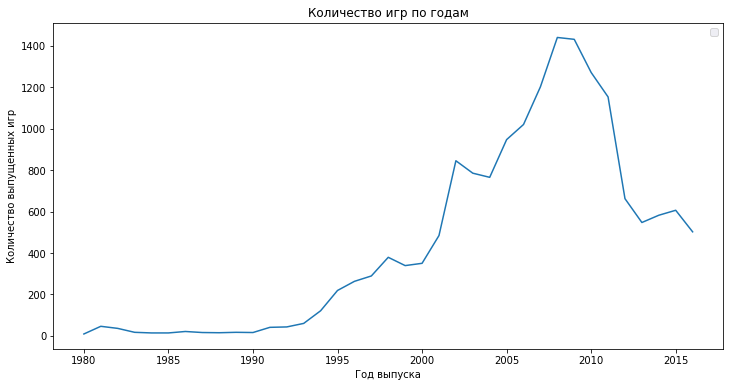

In [26]:
games_by_each_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=games_by_each_year)
sns.set_style('darkgrid')
plt.title("Количество игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('')

**Вывод:**

    - Из графика видно, что с начала 90-х годов количество игр начинает ежегодно расти быстрыми темпоми. Можно попробовать это объяснить развитием компьютеров: широким внедрением CD-ROM для распространения и хранения данных, распространением операционных систем, таких как Microsoft Windows и Mac OS, основывающихся на GUI. Не последнее место сыграло существенное развитие технологий трехмерной графики. Постепенно набирали популярность игровые приставки, такие как Nintendo, Playstation, позже XBOX. Данный рост продолжается до 2008 года.
    
    - В конце 90-х растущие скорости доступа в интернет делают возможным становление браузера как самостоятельной игровой платформы. В середине двухтысячных наступает экспоненциальный рост социальных сетей, которые становятся новым способом общения между людьми. Разработчики игр теперь просто не могут игнорировать браузерную платформу и внутри нее выделяется отдельная платформа и игры под нее. Все это, плюс появление мобильных платформ iOS и Android как раз на рубеже 2008 года, поспособствовало частичной смене акцентов в пользу мобильных приложений и мобильных игр. Отсюда виден резкий спад консольных игр, начиная с 2009 по 2016гг.

#### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

Text(0, 0.5, 'Количество продаж')

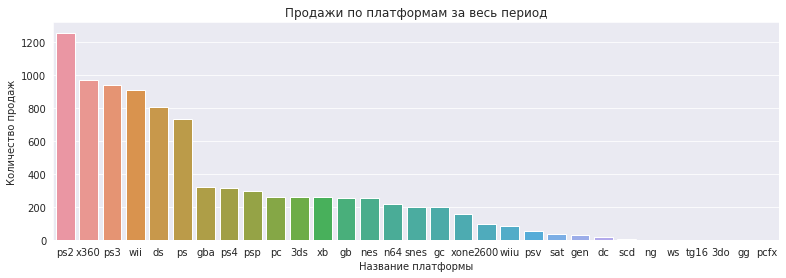

In [27]:
sales_on_platform = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

plt.figure(figsize=(13,4))
sns.barplot(x=sales_on_platform.index,y=sales_on_platform['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Из графика видно, что самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS.<br><br>

In [28]:
platform_grouped = sales_on_platform.reset_index()

In [29]:
#Составим список всех платформ.
top_platforms_list = platform_grouped['platform'].unique()
top_platforms_list

array(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps', 'gba', 'ps4', 'psp', 'pc',
       '3ds', 'xb', 'gb', 'nes', 'n64', 'snes', 'gc', 'xone', '2600',
       'wiiu', 'psv', 'sat', 'gen', 'dc', 'scd', 'ng', 'ws', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

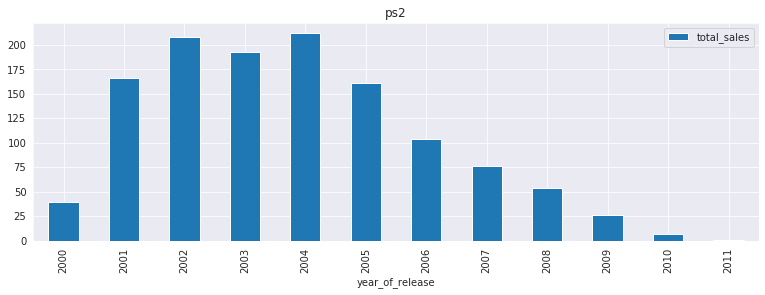

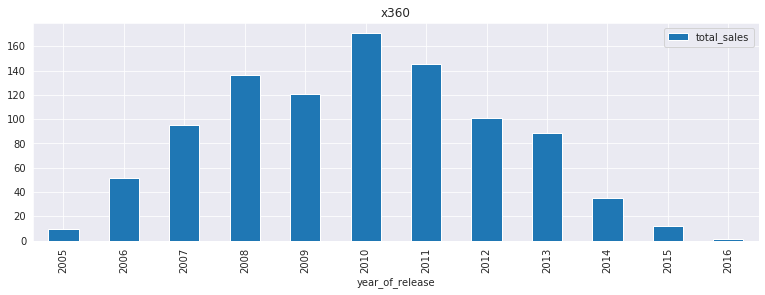

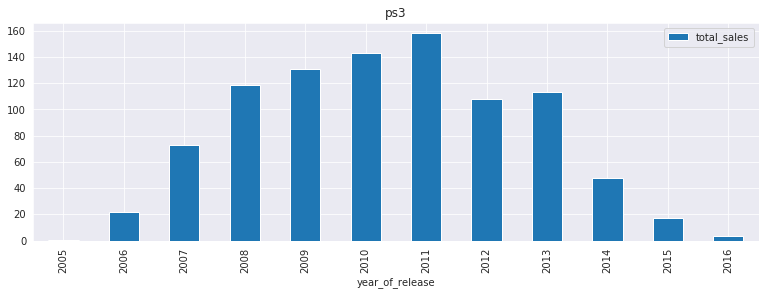

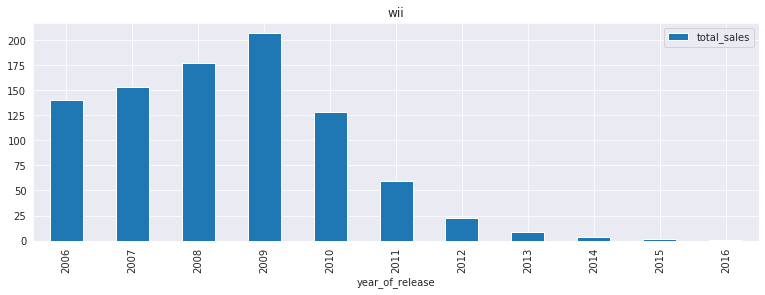

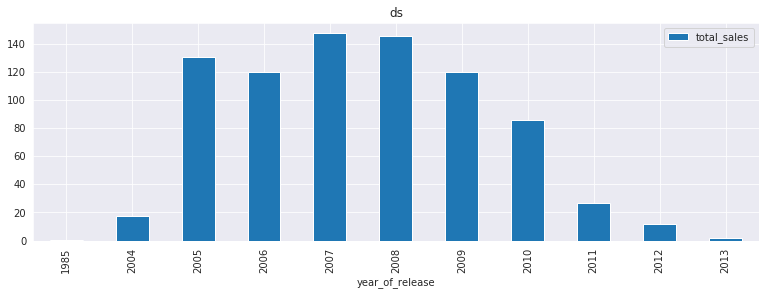

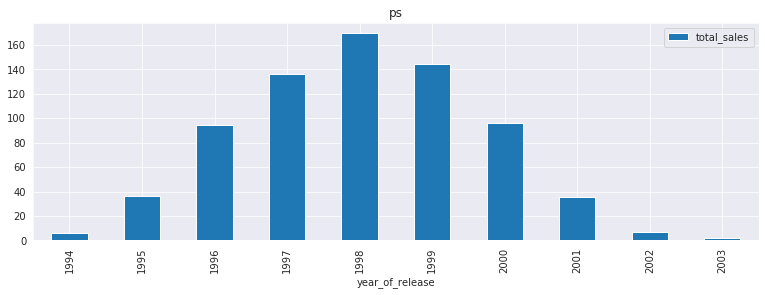

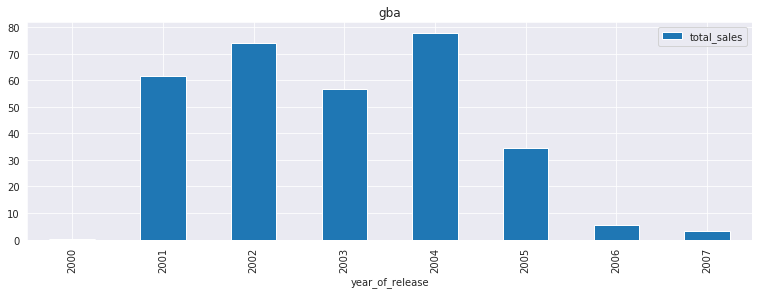

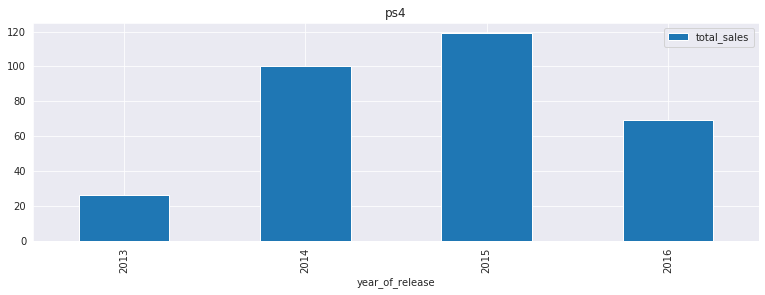

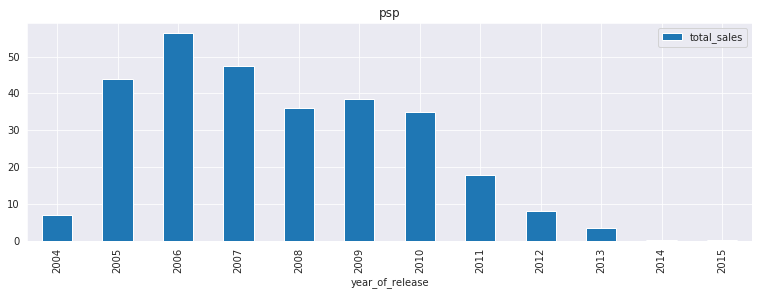

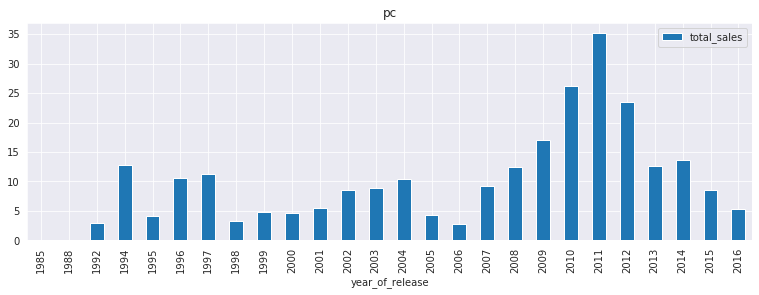

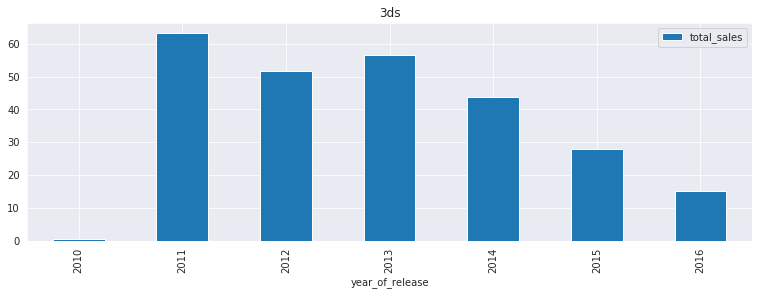

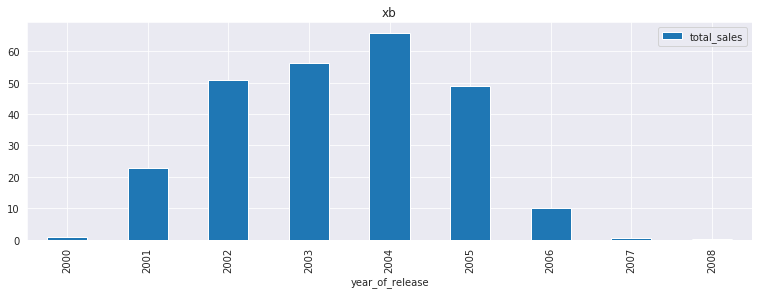

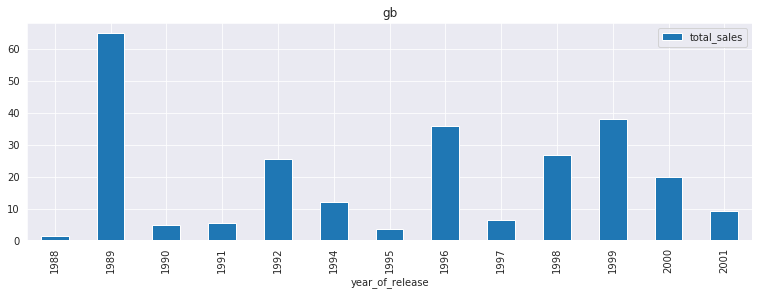

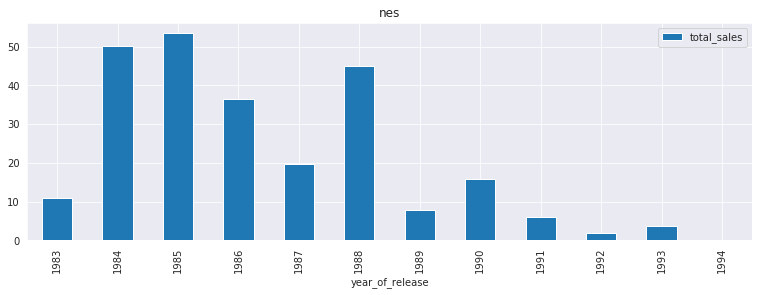

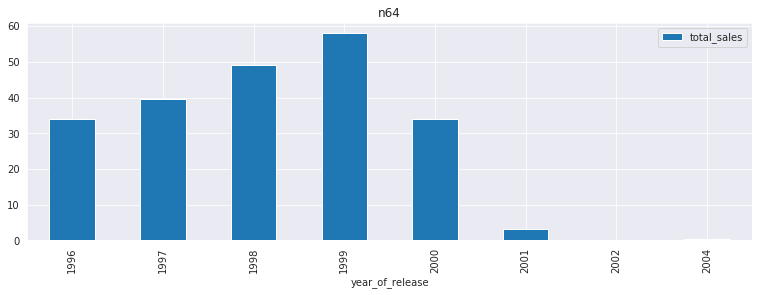

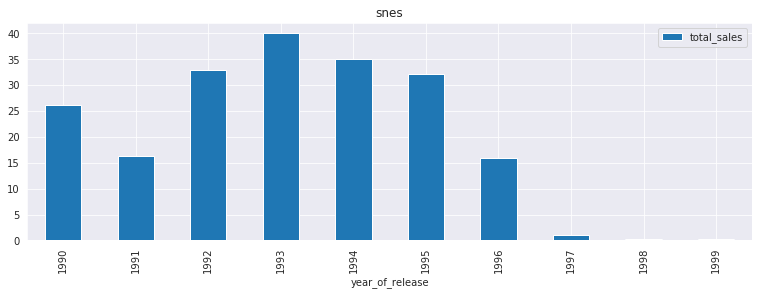

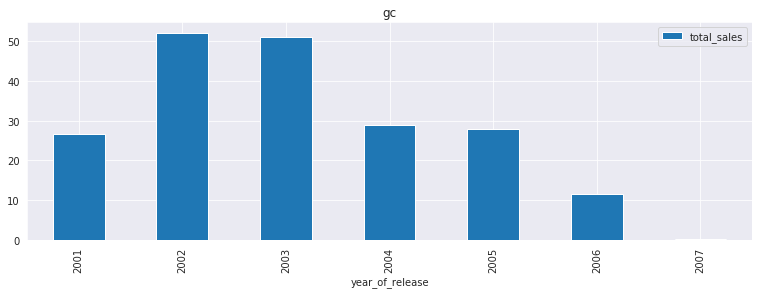

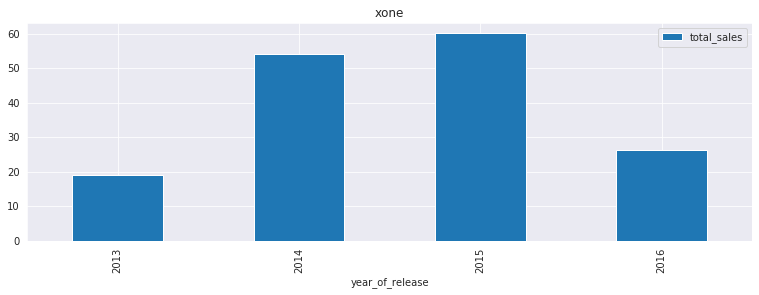

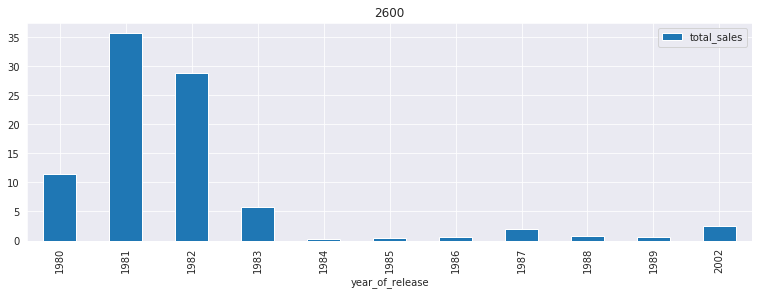

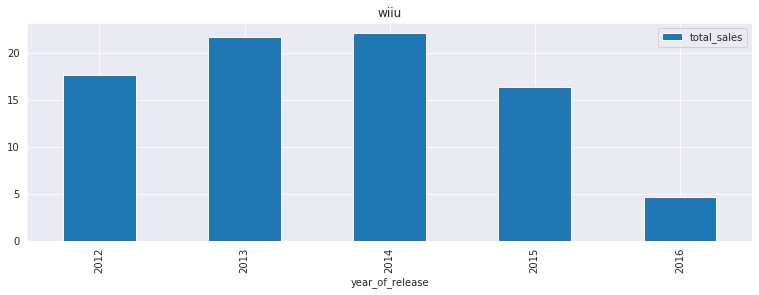

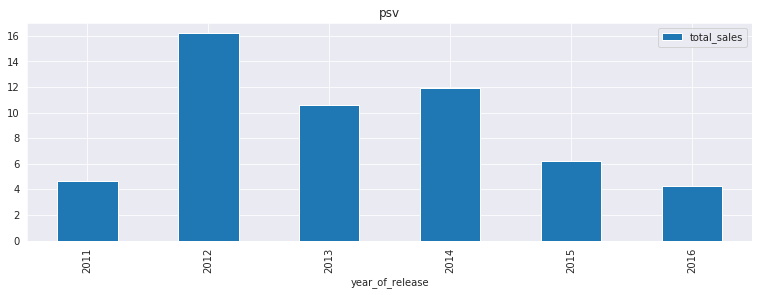

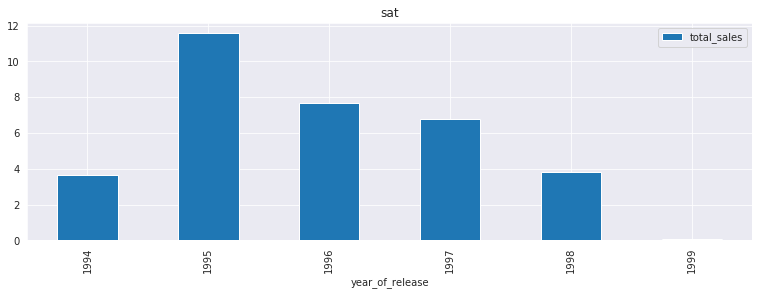

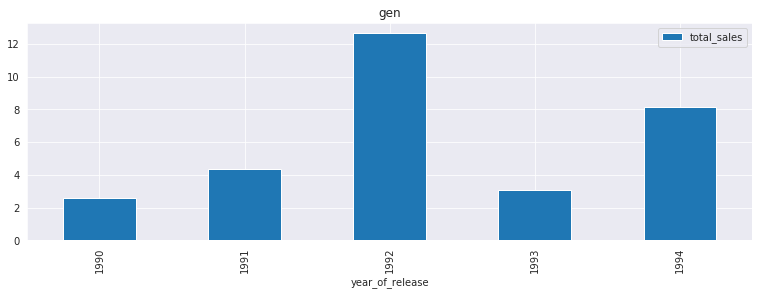

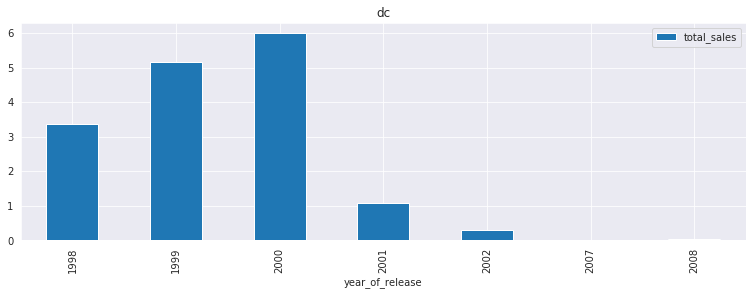

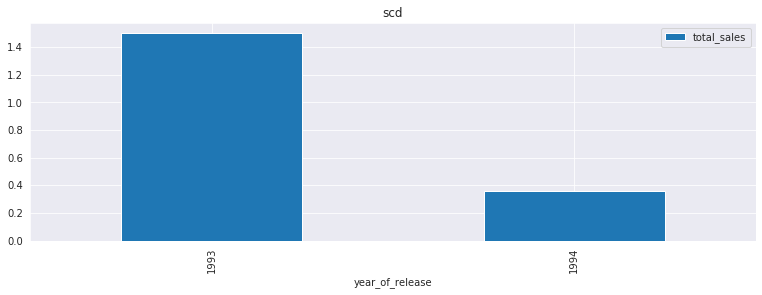

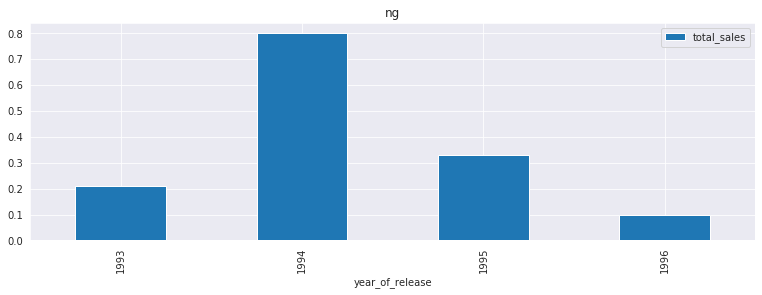

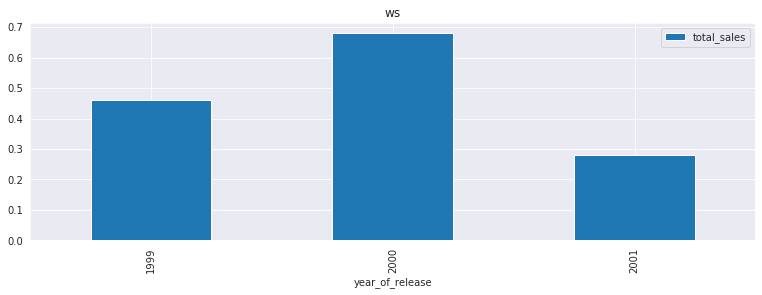

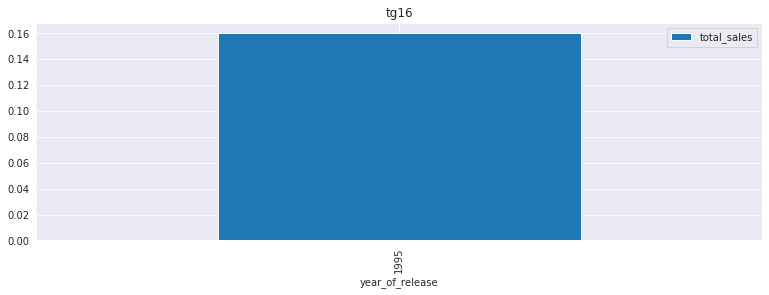

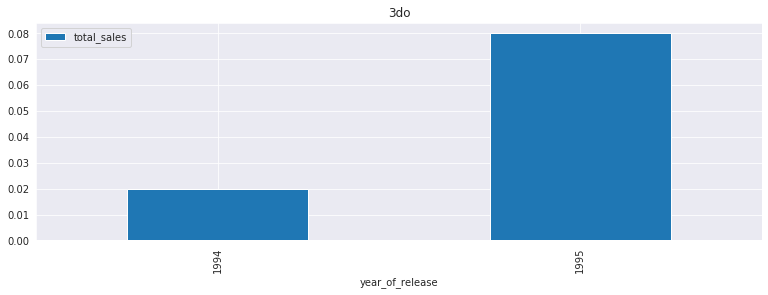

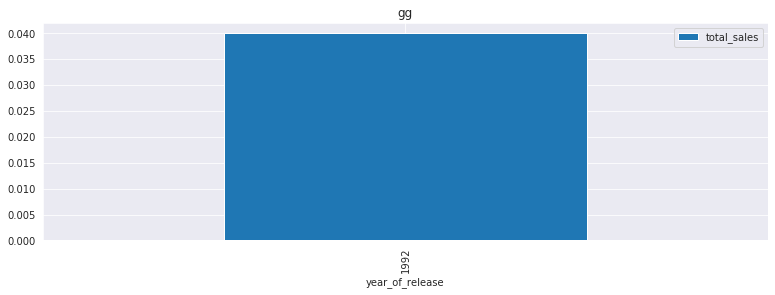

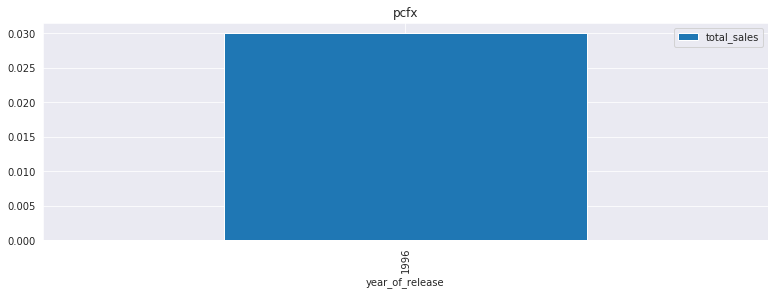

In [30]:
#Построим распределения по годам для каждой платформы.
for platform in top_platforms_list:
    games[games['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.title(platform)

In [31]:
# Добавил на 1 шаге в импорт библиотек строку: plt.rcParams.update({'figure.max_open_warning': 0}). Теперь предупреждения нет. 

In [32]:
# Создадим свою таблицу по платформам и их обшим продажам. отсортируем их по убыванию и оставим только топ 5.
top_5_platforms = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).head(5)
top_5_platforms = top_5_platforms.reset_index().rename_axis(None, axis=1)

In [33]:
# Выведем топ 5 продаваемых платформ
top_5_platforms

,platform,total_sales
0,ps2,1255.77
1,x360,971.42
2,ps3,939.65
3,wii,907.51
4,ds,806.12


**Вывод:**

    - Отталкиваясь от диаграмм распределения, можно сделать вывод, что средний период 'жизни' платформ длится 8-10 лет.
    - Пятерка лидирующих по продажам за всё время платформ в нашем датасете теряет свое могущество на момент 2016 года, как священная Римская Империя в своё время.
    - Большая часть платформ из нашего списка уже приказала долго жить. Из тех, кто продолжает оставаться на плаву в 2016 году, можно отметить: PS4, PC, Nintendo 3DS, XBOX One, Nintendo Wii U, PlayStation Vita.  

#### Определим период, за который нужно взять данные для дальнейшего исследования.

In [34]:
# Сейчас у нас выделяются 3 явных этапа развития индустрии: рост до 2008 года, пик 2008 и 2009 годов, а также сокращение рынка
# последних годов.
# Также большей части платформ уже нет в 2016 году, в построении прогноза на 2017 год они нам не помогут.
# При уменьшении периода в рассмотрение попадут только последние поколения платформ, а также будем рассматривать только
# конечный на данный момент интервал развития игровой индустрии.
decline_period_data = games[games['year_of_release'] > 2009]
decline_period_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,kinect adventures!,x360,2010,misc,15.00,4.89,0.24,1.69,61.0,6.3,e,21.82
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
27,pokemon black/pokemon white,ds,2010,role-playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
29,call of duty: modern warfare 3,x360,2011,shooter,9.04,4.24,0.13,1.32,88.0,3.4,m,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


#### Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам.

In [35]:
#Сохраним в переменной df_top_5_platforms только последние поколения платформ и избавимся от выбросов
list_of_top_6 = ['ps4','xone','pc','wiiu','3ds', 'psv']
games_top_6_platforms = decline_period_data[decline_period_data['platform'].isin(['ps4','xone','pc','wiiu','3ds', 'psv'])]
games_top_6_platforms = games_top_6_platforms[games_top_6_platforms['total_sales']<1.4]

In [36]:
games_top_6_platforms['total_sales'].describe()

count    2051.000000
mean        0.206845
std         0.271240
min         0.010000
25%         0.030000
50%         0.090000
75%         0.260000
max         1.390000
Name: total_sales, dtype: float64

In [37]:
#Посмотрим на количество выпущенных каждой платформой игр, а также на средние глобальные продажи по платформам.
games_top_6_platforms.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,480.0,0.215146,0.266073,0.01,0.04,0.11,0.2625,1.39
pc,469.0,0.171002,0.237493,0.01,0.03,0.07,0.2000,1.36
ps4,326.0,0.258558,0.298397,0.01,0.05,0.12,0.3600,1.32
psv,426.0,0.114648,0.168551,0.01,0.02,0.05,0.1300,1.31
wiiu,135.0,0.294222,0.302792,0.01,0.07,0.19,0.4200,1.30
xone,215.0,0.315907,0.364930,0.01,0.05,0.16,0.4550,1.39


Text(0, 0.5, 'Глобальные продажи')

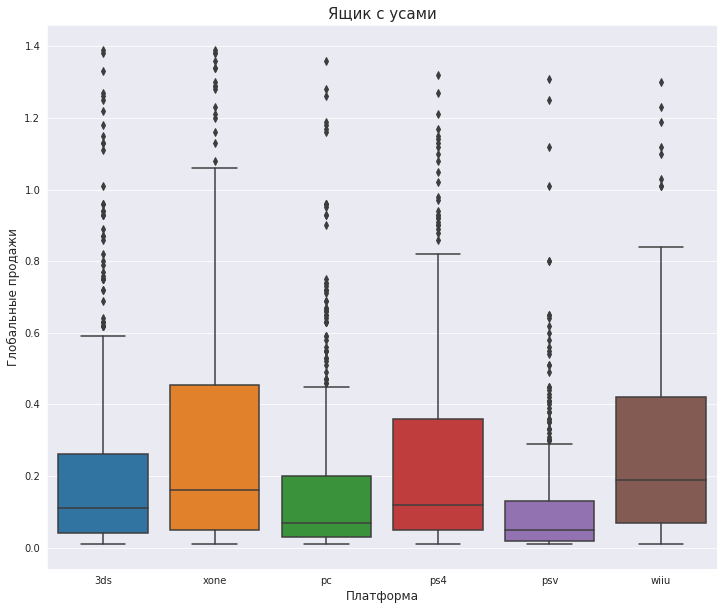

In [38]:
#Отрисуем ящики с усами 
plt.figure(figsize=(12,10))
sns.boxplot(data=games_top_6_platforms, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

**Вывод**

    - Исходя из графиков видно, что медиана протекает у всех по разному.
    - Больше всех продаж у WiiU, затем XOne, после PS4, 3DS, PC и PSV на последнем месте.
    - Успех WiiU можно попробовать объяснить наличием в данной модели нового контроллера, который мог использоваться как дополнительный сенсорный экран. Также браузер WiiU на момент ее выхода (конец 2012 года) был одним из лучших среди домашних консолей.
    - Положение Xbox One и PlayStation 4 можно объяснить тем, что данные приставки позднее остальных вышли на рынки. Часть стран увидела их в конце 2013, часть только во второй половине 2014.
    - ПК на данном промежутке времени отошли на второй план, уступив авансцену приставкам.

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [39]:
#Корреляция между оценками пользователей и продажами 
sony_play_station4 = games[games['platform']=='ps4']
sony_play_station4['user_score'].corr(sony_play_station4['total_sales'])

-0.031957110204556424

Text(0.5, 1.0, 'corr_ps4_users')

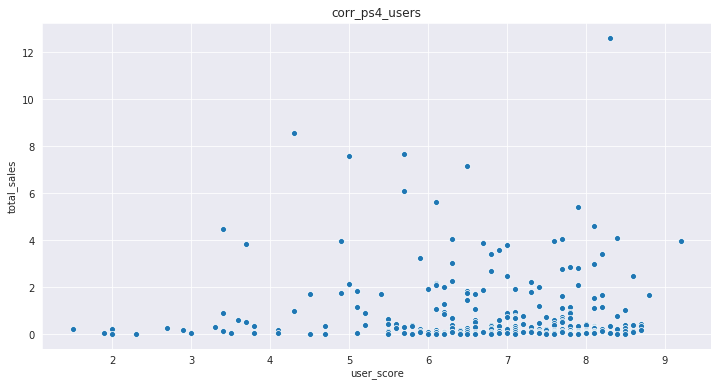

In [40]:
#Построим диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=sony_play_station4)
plt.title('corr_ps4_users')

In [41]:
#Корреляция между оценками критиков и продажами 
sony_play_station4 = games[games['platform']=='ps4']
sony_play_station4['critic_score'].corr(sony_play_station4['total_sales'])

0.40656790206178095

Text(0.5, 1.0, 'corr_ps4_critics')

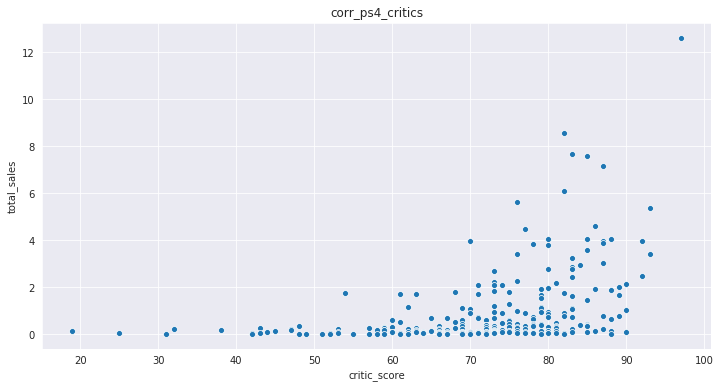

In [42]:
#Построим диаграмму рассеяния по оценкам критиков 
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=sony_play_station4)
plt.title('corr_ps4_critics')

#### Соотнесем выводы с продажами игр на других платформах.

In [43]:
#Напишем функцию, которая будет отрисовывать графики рассеивания и считать корреляции
def other_platform_matrix(name_of_platform):
    platform = games[games['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    correl = platform['user_score'].corr(platform['total_sales'])
    critic_correl = platform['critic_score'].corr(platform['total_sales'])
    
    
    if 0.3 >= critic_correl >= 0.1:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Слабая', critic_correl)
    if 0.5 >= critic_correl >= 0.3:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Умеренная', critic_correl)
    if 0.7 >= critic_correl >= 0.5:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Высокая', critic_correl)
    if 0.9 >= critic_correl >= 0.7:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Весьма высокая', critic_correl)
    if 1 >= critic_correl >= 0.9:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Сильная', critic_correl)
    
    if 0.3 >= correl >= 0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая', correl)
    if 0.5 >= correl >= 0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная', correl)
    if 0.7 >= correl >= 0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая', correl)
    if 0.9 >= correl >= 0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Весьма высокая', correl)
    if 1 >= correl >= 0.9:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Сильная', correl)
    print('\n')
    
    if 0.1 >= correl >= -0.1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Корреляция не выявлена', correl)
    if -0.1 >= correl >= -0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая обратная', correl)
    if -0.3 >= correl >= -0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная обратная', correl)
    if -0.5 >= correl >= -0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая обратная', correl)
    if -0.7 >= correl >= -0.9:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Весьма высокая обратная', correl)
    if -0.9 >= correl >= -1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Сильная обратная', correl)
    print('\n')

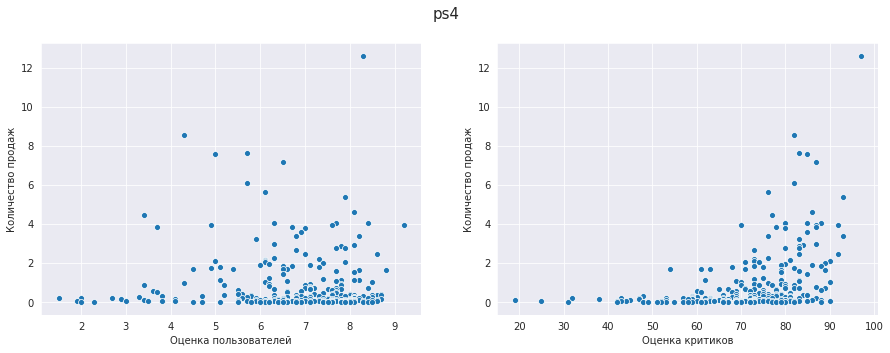

Корреляция между отзывами критиков и игровой платформой  PS4 : Умеренная 0.40656790206178095


Корреляция между отзывами пользователей и продажами  PS4 : Корреляция не выявлена -0.031957110204556424




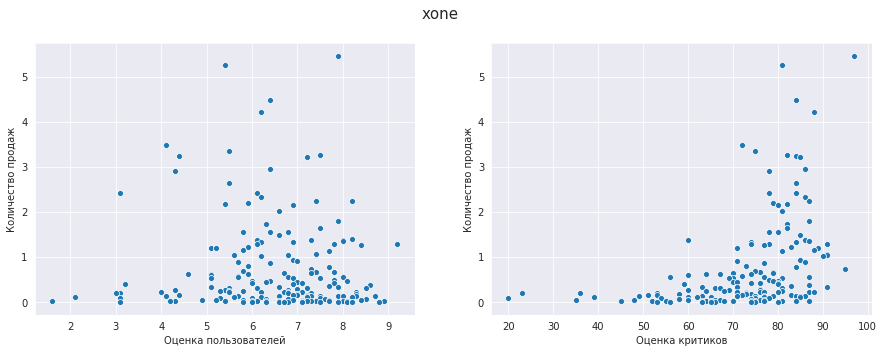

Корреляция между отзывами критиков и игровой платформой  XONE : Умеренная 0.4169983280084017


Корреляция между отзывами пользователей и продажами  XONE : Корреляция не выявлена -0.06892505328279414




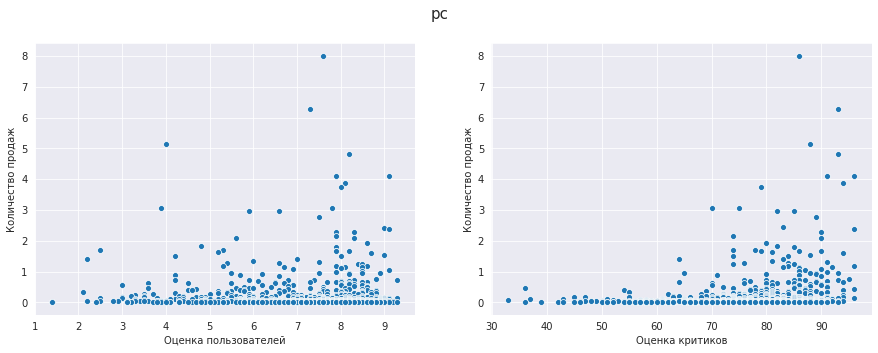

Корреляция между отзывами критиков и игровой платформой  PC : Слабая 0.2568867378948215


Корреляция между отзывами пользователей и продажами  PC : Корреляция не выявлена 0.010475684621486417




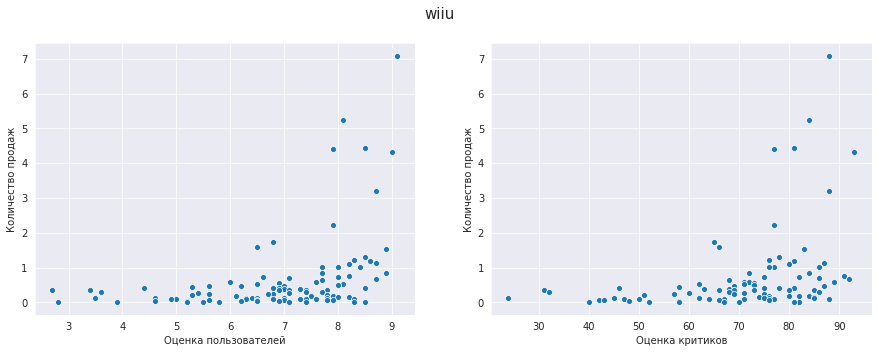

Корреляция между отзывами критиков и игровой платформой  WIIU : Умеренная 0.34837976012017485
Корреляция между отзывами пользователей и продажами  WIIU : Умеренная 0.4002190202148617






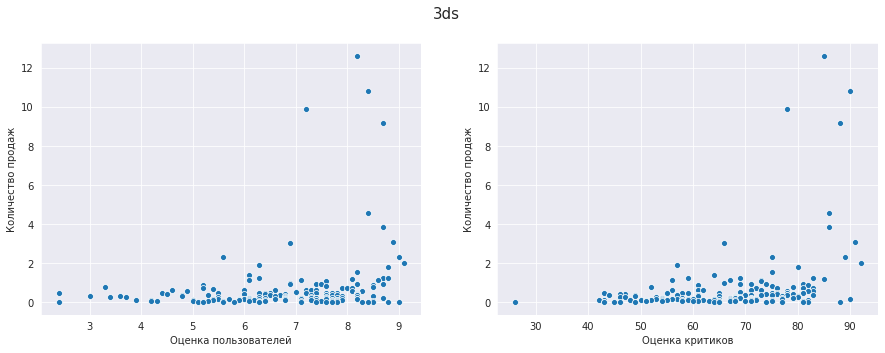

Корреляция между отзывами критиков и игровой платформой  3DS : Умеренная 0.3494009303924131
Корреляция между отзывами пользователей и продажами  3DS : Слабая 0.22480798039571082






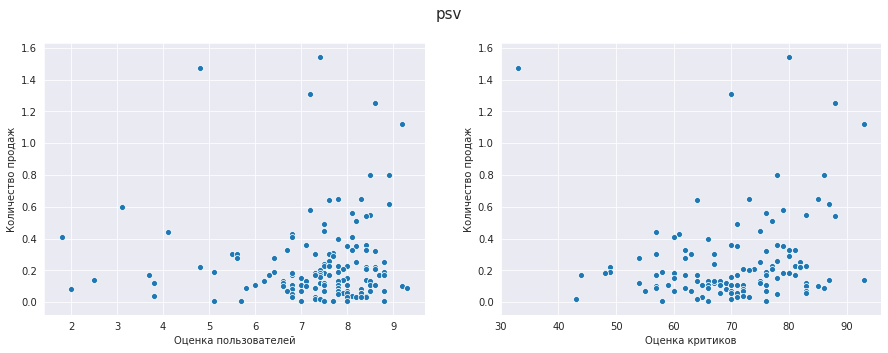

Корреляция между отзывами критиков и игровой платформой  PSV : Слабая 0.1315167215429264


Корреляция между отзывами пользователей и продажами  PSV : Корреляция не выявлена 0.013579522883028902




In [44]:
#С помощью цикла выведем все 6 графиков
for platform in list_of_top_6:
    other_platform_matrix(platform)

**Вывод:**

   У PS4, Xbox One, WiiU, 3DS наблюдается пусть и не сильная, но всё же, связь между оценками критиков и продажами. 
   А связь между оценками пользователей и продажами слабая у всех платформ, либо её совсем нет. Только у WiiU корреляция между отзывами пользователей и продажами - уверенная и даже выше, чем корреляция между отзывами критиков и игровой платформой. Интересное наблюдение (окружен, но не сломлен).
   Это говорит о том, что покупатели прислушиваются больше к критикам, нежели к оценкам других пользователей. Но, опять же, данная аксиома не распространяется на платформу WiiU: там пользователи заправляют балом.

#### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [45]:
distr_genre = games_top_6_platforms.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)
distr_genre

,genre,total_sales
0,action,140.93
1,role-playing,64.63
2,shooter,45.27
3,sports,43.31
4,misc,25.83
5,adventure,18.22
6,platform,17.95
7,simulation,17.60
8,racing,16.55
9,fighting,15.48


Text(0, 0.5, 'Продажи')

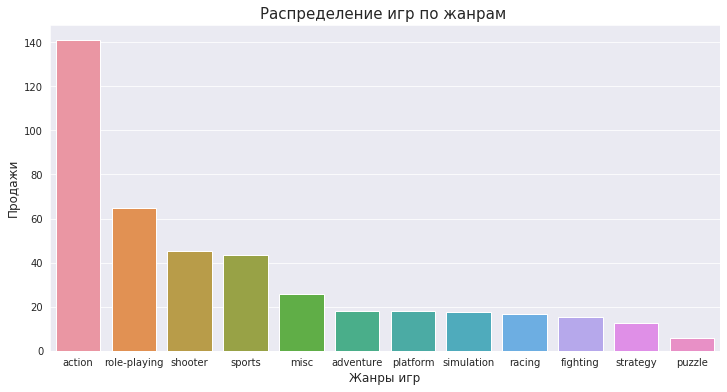

In [46]:
#Отрисуем барплот чтобы наглядно посмотреть какие жанры лидирует, а какие остаются внизу
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)


 - Впереди планеты всей жанр 'Action'. 'Puzzle' киснут на последнем месте. Однако не стоит забывать, что производство игр в жанрах Action или Shooter обходится сильно дороже, чем производство Puzzle-игр.

### Вывод по исследовательскому анализу данных:

- Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок игр на игровые платформы.
- Самые популярные игровые платформы за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation.
- Средняя жизнь игровой платформы составляет 8-10 лет. Пик продаж наступает примерно через 5 лет после выхода приставки.
- Больше всего было продано игр на Sony Playstation и Xbox 360.
- У анализируемых нами платформ наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки почти не играют значимой роли. Это значит, что для людей мнение критиков важнее мнения других пользователей.
- Самый популярный жанр за последние 10 лет: 'Action'. Якорем висит жанр 'Puzzle'.


## Шаг 4. Составим портрет пользователя каждого региона

#### Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5), жанры (топ-5), влияние рейтинга ESRB на продажи.

In [47]:
#Функция для создания сводбных таблиц за весь период
def user_portrait(row, title):
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']),axes):
        ppivot = games.pivot_table(index=pivot, values=row, aggfunc='sum'
                  ).sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        display(ppivot)
 
        sns.set_palette("Blues")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
        

plt.show()
sns.set()

#Функция для создания сводных таблиц за последний год
def user_portrait_2016(row, title):
    temp = games[games['year_of_release']>2015]
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']), axes):
        ppivot = temp.pivot_table(index=pivot, values=row, aggfunc='sum').sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        display(ppivot)

        sns.set_palette("BuGn_r")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)

### Портрет пользователя North America

,platform,na_sales
0,x360,602.47
1,ps2,583.84
2,wii,496.90
3,ps3,393.49
4,ds,382.40


,genre,na_sales
0,action,879.01
1,sports,684.43
2,shooter,592.24
3,platform,445.50
4,misc,407.27


,rating,na_sales
0,e,1292.99
1,t,759.75
2,m,748.48
3,e10+,353.32
4,k-a,2.56


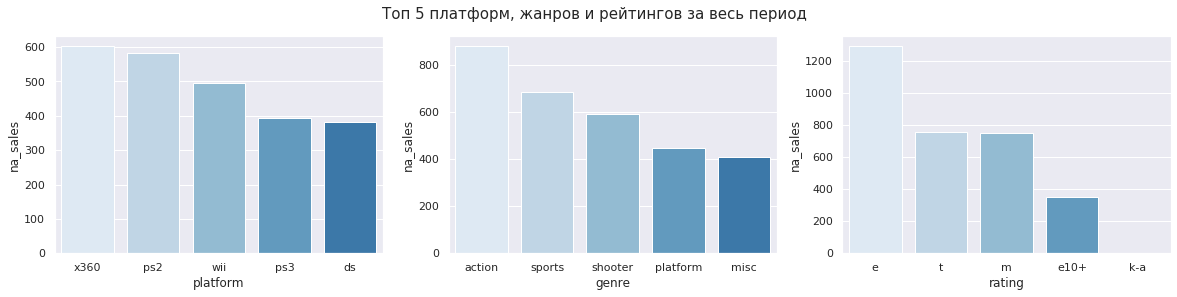

In [50]:
#Выведем топ 5 платформ, жанров и рейтингов за весь период
user_portrait('na_sales','Топ 5 платформ, жанров и рейтингов за весь период')

,platform,na_sales
0,ps4,21.49
1,xone,14.27
2,3ds,4.14
3,wiiu,2.10
4,pc,1.36


,genre,na_sales
0,shooter,16.24
1,action,9.29
2,sports,7.54
3,role-playing,5.89
4,fighting,1.84


,rating,na_sales
0,m,15.67
1,t,8.95
2,e,7.97
3,e10+,3.81


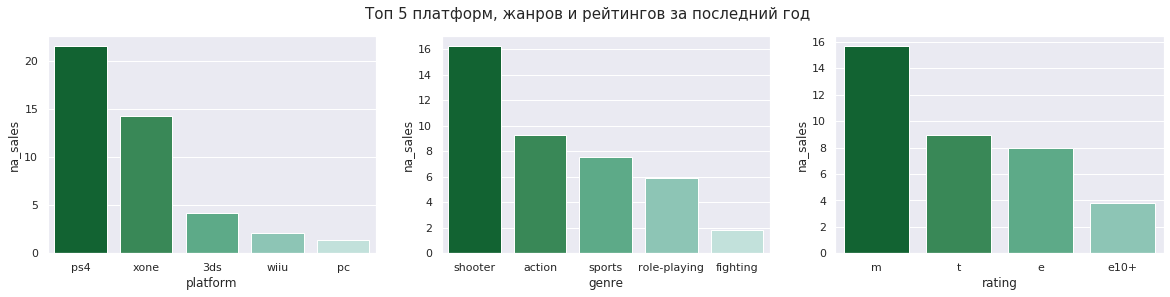

In [51]:
#Выведем топ 5 платформ, жанров и рейтингов за последний год
user_portrait_2016('na_sales','Топ 5 платформ, жанров и рейтингов за последний год')

**Вывод:**
- Самые популярные игровые платформы в Северной Америке за все время это: XBOX, PS2, WII, PS3, DS.
- Топ 5 жанров в Северной Америке за все время: action, sports, shooter, platform, misc.
- По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".

  Если же взять данные за последний год, то общая картина заметно меняется:
- Топ игровых приставок выглядит таким образом : PS4, Xone, 3DS, WiiU, PC.
- Топ жанров игр: Shooter, Action, Sports, Role-Playing, Fighting.
- Топ рейтингов игр : "От 17 и выше" , "от 13 и выше" и "для всех".

### Портрет пользователя European Union

,platform,eu_sales
0,ps2,339.29
1,ps3,330.29
2,x360,270.76
3,wii,262.21
4,ps,213.61


,genre,eu_sales
0,action,519.13
1,sports,376.79
2,shooter,317.34
3,racing,236.51
4,misc,212.74


,rating,eu_sales
0,e,710.25
1,m,483.97
2,t,427.03
3,e10+,188.52
4,ao,0.61


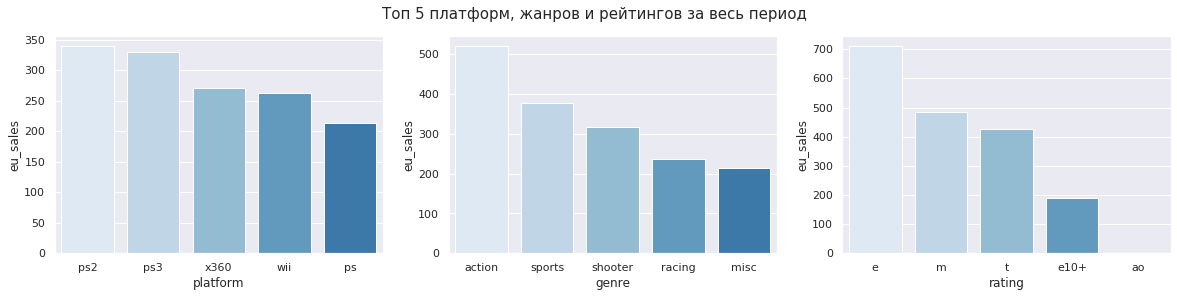

In [52]:
#Выведем топ 5 платформ, жанров и рейтингов за весь период
user_portrait('eu_sales','Топ 5 платформ, жанров и рейтингов за весь период')

,platform,eu_sales
0,ps4,31.78
1,xone,9.63
2,pc,3.53
3,3ds,2.33
4,wiiu,1.48


,genre,eu_sales
0,shooter,15.90
1,sports,12.01
2,action,10.68
3,role-playing,4.28
4,racing,1.77


,rating,eu_sales
0,m,16.54
1,e,13.61
2,t,9.79
3,e10+,3.81


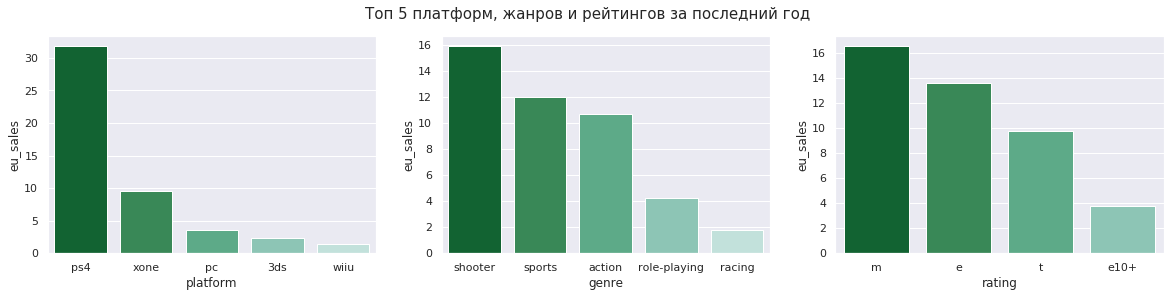

In [53]:
#Выведем топ 5 платформ, жанров и рейтингов за последний год
user_portrait_2016('eu_sales','Топ 5 платформ, жанров и рейтингов за последний год')

**Вывод:**
- Самые популярные игровые платформы в Европе за все время это: PS2, PS3, X360, WII, PS.
- Топ 5 жанров в Европе за все время: action, sports, shooter, racing, misc.
- По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "от 13 и выше".

  Если же взять данные за последний год, то общая картина заметно меняется:
- Топ игровых приставок выглядит таким образом : PS4, Xone, PC, 3DS, WiiU.
- Топ жанров игр: Shooter, Sports, Action, Role-Playing, Racing.
- Топ рейтингов: "От 17 и выше" , "Для всех" и "от 13 и выше"

### Портрет пользователя Japanese 

,platform,jp_sales
0,ds,175.57
1,ps,139.82
2,ps2,139.20
3,snes,116.55
4,3ds,100.67


,genre,jp_sales
0,role-playing,355.41
1,action,161.43
2,sports,135.54
3,platform,130.83
4,misc,108.11


,rating,jp_sales
0,e,198.11
1,t,151.40
2,m,64.24
3,e10+,40.20
4,k-a,1.46


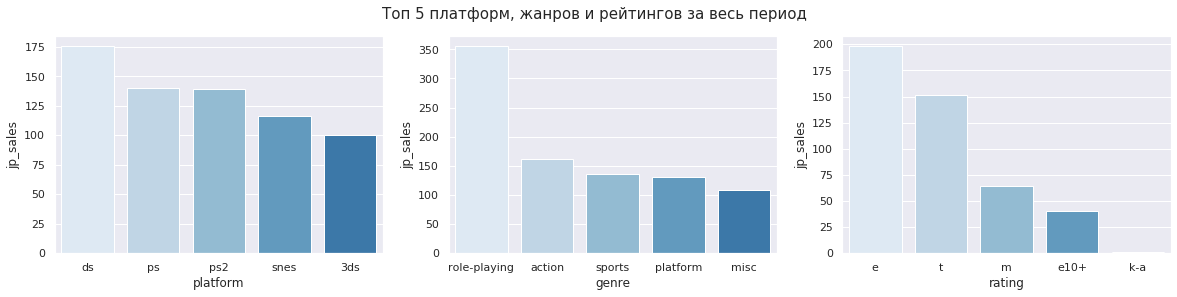

In [54]:
#Выведем топ 5 платформ, жанров и рейтингов за весь период
user_portrait('jp_sales','Топ 5 платформ, жанров и рейтингов за весь период')

,platform,jp_sales
0,3ds,8.03
1,ps4,5.74
2,psv,3.56
3,ps3,1.30
4,wiiu,0.67


,genre,jp_sales
0,action,7.07
1,role-playing,6.61
2,adventure,1.18
3,shooter,1.06
4,misc,1.04


,rating,jp_sales
0,t,2.27
1,m,1.20
2,e,1.07
3,e10+,0.45


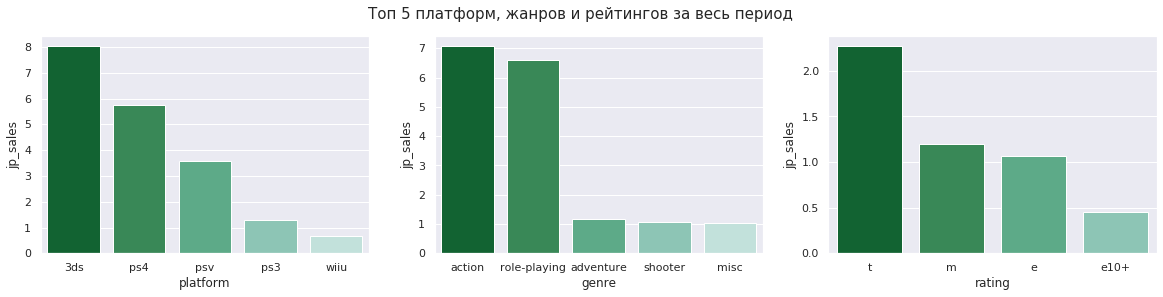

In [55]:
#Выведем топ 5 платформ, жанров и рейтингов за последний год
user_portrait_2016('jp_sales','Топ 5 платформ, жанров и рейтингов за весь период')

**Вывод:**
- Самые популярные игровые платформы в Японии за все время это: DS, PS, PS2, SNES, 3DS.
- Топ 5 жанров в Японии за все время: role-playing, action, sports, platform, misc.
- По рейтингам видно, что больше всего продаж за все время у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".

  Если же взять данные за последний год, то общая картина заметно меняется:
- Топ игровых приставок выглядит таким образом : 3DS, PS4, PSV, PS3,  WiiU.
- Топ жанров игр: Action, Role-Playing, Adventure, Shooter, Misc.
- Топ рейтингов: "От 13 и выше", "От 17 и выше" и "Для всех".  

#### Визуализируем суммарные продажи игр по жанрам, рейтингу и платформам.

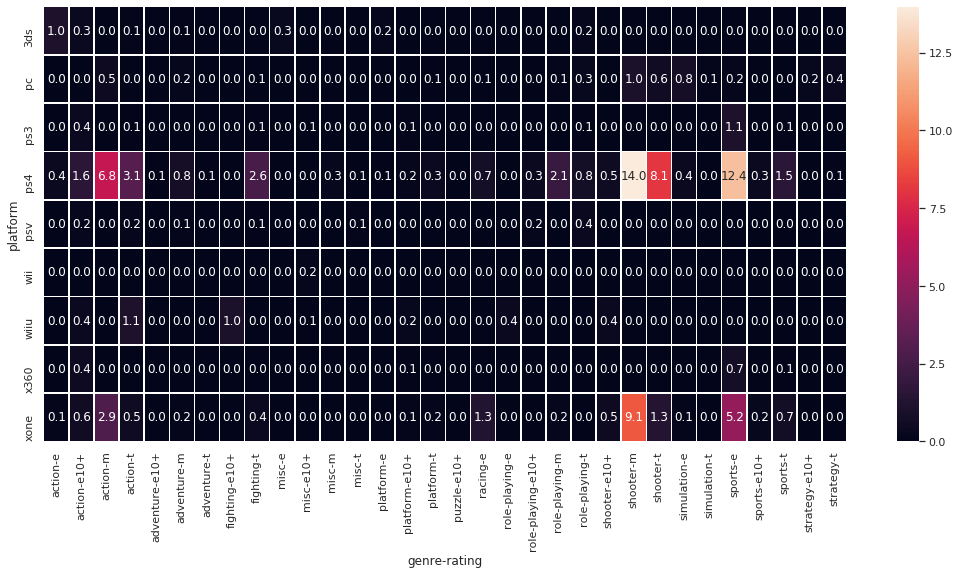

In [81]:
platform_genre_sales = games[games['year_of_release']>2015].pivot_table(
    index='platform', columns=['genre', 'rating'], values='total_sales', aggfunc='sum').fillna(0).applymap(float)
plt.figure(figsize=(18,8))
sns.heatmap(platform_genre_sales, annot=True, fmt='.1f', linewidths=.5)

#### В нашем датасете предостаточно игр без рейтинга. Посмотрим на их продажи по регионам за 2016 год. 

#### Продажи игр без рейтинга в Северной Америке.

In [76]:
# Продажи игр без рейтинга по платформам для Северной Америки.
no_rate_na = games[pd.isnull(games['rating'])]
no_rate_na = no_rate_na[no_rate_na['year_of_release']>2015]
no_rate_na.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(
        by='na_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(60)

,platform,na_sales
0,3ds,3.38
1,ps4,3.12
2,xone,1.40
3,wiiu,0.35
4,ps3,0.19
5,pc,0.08
6,x360,0.01
7,psv,0.00


In [77]:
# Продажи игр без рейтинга по жанрам для Северной Америки.
no_rate_na[no_rate_na['na_sales'] > 0].pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(
        by='na_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(60)

,genre,na_sales
0,role-playing,4.36
1,action,1.62
2,shooter,1.11
3,platform,0.55
4,adventure,0.35
5,misc,0.32
6,racing,0.11
7,sports,0.06
8,fighting,0.05


In [78]:
# Количество игр без рейтинга в разрезе платформ, где продажи не равны нулю, в Северной Америке.
no_rate_na[no_rate_na['na_sales'] > 0].pivot_table(index='platform', values='na_sales', aggfunc='count').sort_values(
        by='na_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(60)

,platform,na_sales
0,ps4,23
1,xone,14
2,3ds,7
3,ps3,3
4,pc,2
5,wiiu,2
6,x360,1


#### Выводы по продажам игр без рейтинга в Северной Америке:
    - Во-первых, самих игр с ненулевыми продажами не так много. 
    - Лидирующая по продажам платформа - 3DS. Следом идут PS4 и Xbox One.
    - Лидирующий по продажам жанр - Role-Playing. С заметным отставанием идут Action и Shooter.

#### Продажи игр без рейтинга в Европе.

In [87]:
# Продажи игр без рейтинга по платформам для Европе.
no_rate_eu = games[pd.isnull(games['rating'])]
no_rate_eu = no_rate_eu[no_rate_eu['year_of_release']>2015]
no_rate_eu.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(
        by='eu_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(60)

,platform,eu_sales
0,ps4,3.91
1,3ds,1.84
2,xone,0.78
3,pc,0.48
4,wiiu,0.31
5,ps3,0.13
6,x360,0.02
7,psv,0.00


In [88]:
# Продажи игр без рейтинга по жанрам для Европы.
no_rate_eu[no_rate_eu['eu_sales'] > 0].pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(
        by='eu_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(60)

,genre,eu_sales
0,role-playing,2.65
1,action,1.16
2,shooter,1.07
3,platform,0.79
4,adventure,0.69
5,racing,0.51
6,sports,0.18
7,misc,0.17
8,strategy,0.12
9,simulation,0.11


In [89]:
# Количество игр без рейтинга в разрезе платформ, где продажи не равны нулю, в Европе.
no_rate_eu[no_rate_eu['eu_sales'] > 0].pivot_table(index='platform', values='eu_sales', aggfunc='count').sort_values(
        by='eu_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(60)

,platform,eu_sales
0,ps4,22
1,pc,17
2,xone,9
3,3ds,5
4,ps3,5
5,wiiu,2
6,x360,1


#### Выводы по продажам игр без рейтинга в Европе:
    - Игр с ненулевыми продажами также не так много. 
    - Лидирующая по продажам платформа - PS4. Следом идут 3DS и Xbox One.
    - Лидирующий по продажам жанр - Role-Playing. С заметным отставанием идут Action и Shooter.

#### Продажи игр без рейтинга в Японии.

In [91]:
# Продажи игр без рейтинга по платформам для Японии.
no_rate_jp = games[pd.isnull(games['rating'])]
no_rate_jp = no_rate_jp[no_rate_jp['year_of_release']>2015]
no_rate_jp.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(
        by='jp_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(60)

,platform,jp_sales
0,3ds,7.05
1,psv,2.94
2,ps4,2.88
3,ps3,1.16
4,wiiu,0.29
5,pc,0.00
6,x360,0.00
7,xone,0.00


In [92]:
# Продажи игр без рейтинга по жанрам для Японии.
no_rate_jp[no_rate_jp['jp_sales'] > 0].pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(
        by='jp_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(60)

,genre,jp_sales
0,action,5.82
1,role-playing,5.22
2,adventure,1.09
3,misc,0.82
4,sports,0.58
5,simulation,0.33
6,strategy,0.23
7,fighting,0.16
8,platform,0.04
9,shooter,0.02


In [93]:
# Количество игр без рейтинга в разрезе платформ, где продажи не равны нулю, в Японии.
no_rate_jp[no_rate_jp['jp_sales'] > 0].pivot_table(index='platform', values='jp_sales', aggfunc='count').sort_values(
        by='jp_sales', ascending=False).reset_index().rename_axis(None, axis=1).head(60)

,platform,jp_sales
0,psv,69
1,ps4,44
2,3ds,28
3,ps3,20
4,wiiu,2


#### Выводы по продажам игр без рейтинга в Европе:
    - В Японии ситуация иная. Игр с ненулевыми продажами и без рейтинга там значительно больше, чем в Америке и Европе. 
    - Лидирующая по продажам платформа с большим перевесом - 3DS. На втором и третьем местах идут PSV и PS4.
    - Лидирующий по продажам жанр - Action. Немного уступает - Role-Playing. И замыкает тройку - Adventure.

### Вывод по составлению портрета пользователя каждого региона

Самые популярные игровые платформы в Северной Америке это: XBOX, PS2, WII, PS3, DS.
Топ 5 жанров в северной америке : action, sports, shooter, platform, misc.
По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".

Самые популярные игровые платформы в Европе это: PS2, PS3, XBOX, WII, PS.
Топ 5 жанров в Европе : action, sports, shooter, racing, misc.
По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом "от 13 и выше"

Самые популярные игровые платформы в Японии это: DS, PS, PS2, SNES, 3DS.
Топ 5 жанров в Японии : Role-Playing, action, sports, platform, misc.
По рейтингам видно, что больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".

Если брать данные за последний год:\
То в Северной Америке:\
топ игровых платформ выглядит так: PS4, Xone, DS3;\
Топ Жанров игр: Shooter, Action, Sports;\
Топ Рейтингов игр: "От 17 и выше" , "от 13 и выше" и "для всех".


В Европейском Союзе:\
Топ игровых платформ : PS4, Xone, PC;\
Топ жанров: Shooter, Sports, Action;\
Топ рейтингов: "От 17 и выше", "для всех", "от 13 и выше".


В Японии:\
Топ игровых платформ : 3DS, PS4, PSV;\
Топ жанров: Action, Role-playing, Adventure;\
Топ рейтингов: "От 13 и выше", "от 17 и выше", "для всех".



Для прогноза будущих продаж лучше брать данные за последний год, так как технологии стремительно развиваются, а вкусы людей могут меняться очень быстро. Соответственно, для 2017 года большую часть прибыли будут приносить игры жанра Shooter, для платформы PS4 и с рейтингом от 17 и выше. На втором месте по продажам разместятся игры жанра Sports, для платформы PS4 и с рейтингом "для всех". И замкнут тройку лидеров тоже игры жанра Shooter с тем же рейтингом от 17 и выше, но уже для платформы XOne.

## Шаг 5. Проведем исследование статистических показателей.

#### Посмотрим, как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах.

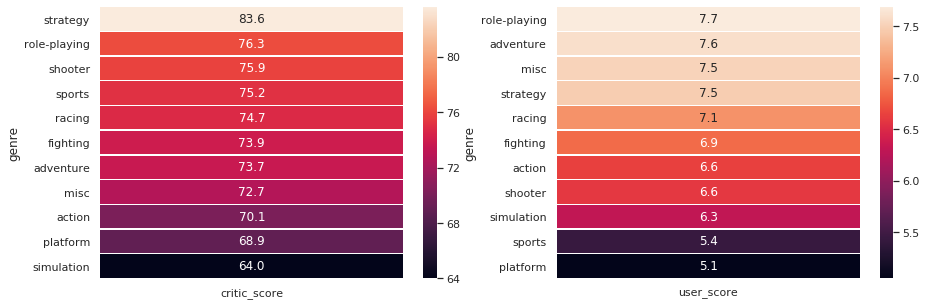

<Figure size 720x360 with 0 Axes>

In [57]:
# Выведем две сводные талицы по жанрам и рейтингам за 2016 год.
critic_genre = games[games['year_of_release'] > 2015].pivot_table(
    index='genre', values='critic_score', aggfunc='mean').fillna(0).applymap(float).sort_values(by='critic_score', ascending=False)
user_genre = games[games['year_of_release'] > 2015].pivot_table(
    index='genre', values='user_score', aggfunc='mean').fillna(0).applymap(float).sort_values(by='user_score', ascending=False)
fig, ax = plt.subplots(1 ,2, figsize=(15,5))
plt.figure(figsize=(10,5))
sns.heatmap(critic_genre, annot=True, fmt='.1f', linewidths=.5, ax=ax[0])
sns.heatmap(user_genre, annot=True, fmt='.1f', linewidths=.5, ax=ax[1])

**Вывод:**

На основе средних оценок по жанрам за 2016 год можно заключить:

- Наивысшие оценки критиков получают: strategy, role-playing, shooter.
- Наивысшие оценки пользователей получают: role-playing, adventure, misc.

Это говорит о том, что мнения критиков по поводу игр не всегда совпадают с мнением пользователей.

#### Посчитаем среднее количество, дисперсию и стандартное отклонение

In [58]:
#Составим массив с игровыми жанрами. 
game_genres = games['genre'].unique()
game_genres = game_genres[:-1]
game_genres

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

In [59]:
# Посчитаем дисперсию, стандартное отклонение, среднее и медиану у разных жанров к оценкам пользователей.
for genre in game_genres:
    print('Дисперсия', genre.upper(),':', np.var(games[games['genre']==genre]['user_score']))
    print('Стандартное отклонение', genre.upper(),':', np.std(games[games['genre']==genre]['user_score']))
    print('Среднее',genre.upper(),':',  games[games['genre']==genre]['user_score'].mean())
    print('Медиана',genre.upper(),':',  games[games['genre']==genre]['user_score'].median())
    print('\n')
    

Дисперсия SPORTS : 2.5941606711770175
Стандартное отклонение SPORTS : 1.6106398328543279
Среднее SPORTS : 6.96119673617407
Медиана SPORTS : 7.4


Дисперсия PLATFORM : 2.2856989693423007
Стандартное отклонение PLATFORM : 1.5118528266145157
Среднее PLATFORM : 7.3014018691588785
Медиана PLATFORM : 7.7


Дисперсия RACING : 2.38795680501167
Стандартное отклонение RACING : 1.5453015255967588
Среднее RACING : 7.036193447737911
Медиана RACING : 7.4


Дисперсия ROLE-PLAYING : 1.1836433722368849
Стандартное отклонение ROLE-PLAYING : 1.0879537546407407
Среднее ROLE-PLAYING : 7.619515477792732
Медиана ROLE-PLAYING : 7.8


Дисперсия PUZZLE : 2.2915625
Стандартное отклонение PUZZLE : 1.5137907715401095
Среднее PUZZLE : 7.175
Медиана PUZZLE : 7.5


Дисперсия MISC : 2.3883950373856506
Стандартное отклонение MISC : 1.5454433141935846
Среднее MISC : 6.819362186788155
Медиана MISC : 7.1


Дисперсия SHOOTER : 2.3020877958621466
Стандартное отклонение SHOOTER : 1.5172632585883528
Среднее SHOOTER : 7.041883

In [60]:
# Посчитаем дисперсию, стандартное отклонение, среднее и медиану у разных жанров к оценкам критиков.
for genre in game_genres:
    print('Дисперсия', genre.upper(),':', np.var(games[games['genre']==genre]['critic_score']))
    print('Стандартное отклонение', genre.upper(),':', np.std(games[games['genre']==genre]['critic_score']))
    print('Среднее',genre.upper(),':',  games[games['genre']==genre]['critic_score'].mean())
    print('Медиана',genre.upper(),':',  games[games['genre']==genre]['critic_score'].median())
    print('\n')

Дисперсия SPORTS : 192.44957338338818
Стандартное отклонение SPORTS : 13.872619557365082
Среднее SPORTS : 71.96817420435511
Медиана SPORTS : 75.0


Дисперсия PLATFORM : 174.2521284649547
Стандартное отклонение PLATFORM : 13.200459403556934
Среднее PLATFORM : 68.05835010060362
Медиана PLATFORM : 69.0


Дисперсия RACING : 202.738568086544
Стандартное отклонение RACING : 14.238629431463691
Среднее RACING : 67.96361185983828
Медиана RACING : 69.0


Дисперсия ROLE-PLAYING : 143.80064768055612
Стандартное отклонение ROLE-PLAYING : 11.991690776556746
Среднее ROLE-PLAYING : 72.65264586160109
Медиана ROLE-PLAYING : 74.0


Дисперсия PUZZLE : 161.46745455994895
Стандартное отклонение PUZZLE : 12.706984479409304
Среднее PUZZLE : 67.42410714285714
Медиана PUZZLE : 70.0


Дисперсия MISC : 199.9144953551543
Стандартное отклонение MISC : 14.139112254846635
Среднее MISC : 66.61950286806884
Медиана MISC : 69.0


Дисперсия SHOOTER : 211.55299191144783
Стандартное отклонение SHOOTER : 14.544861357587697
С

#### Построим распределения оценок пользователей и критиков по жанрам игр.

In [104]:
# Напишем функцию для отрисовки гистограм.
def genre_hist(genre):
    fig, axes = plt.subplots()
    data = games[games['genre'] == genre]
    user_score = data['user_score'] * 10
    critic_score = data['critic_score']
    colors = ['black', 'r']

    plt.hist([user_score, critic_score], color = colors, alpha=.9, label = ['user_score', 'critic_score'])
    plt.legend()
    plt.title(genre)

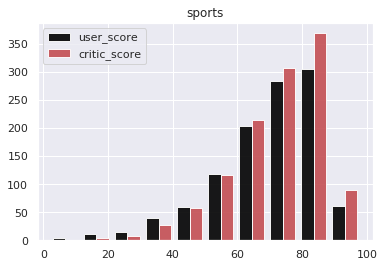

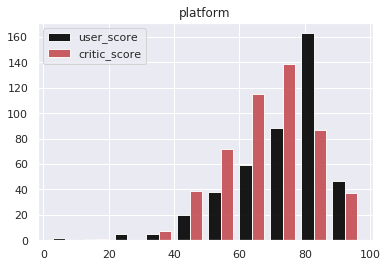

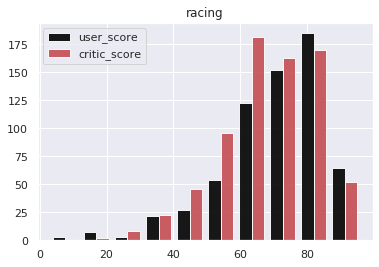

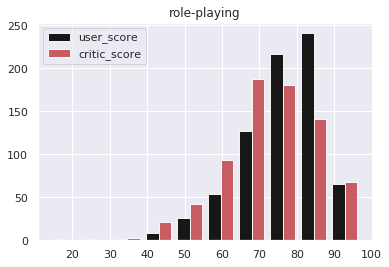

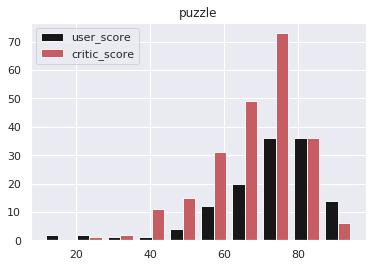

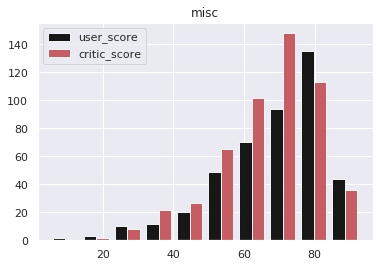

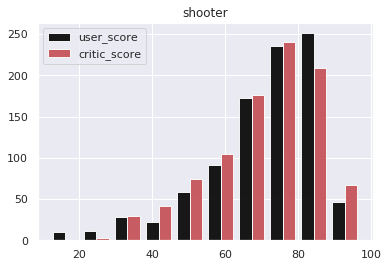

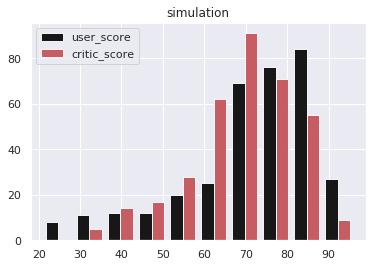

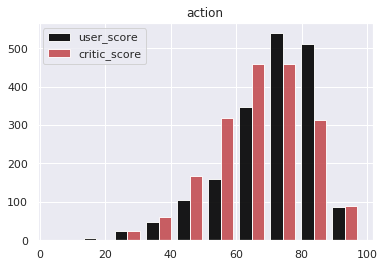

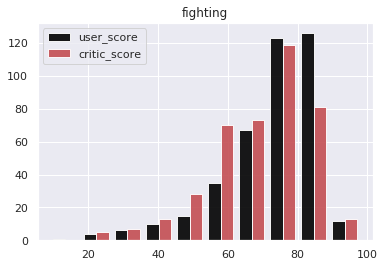

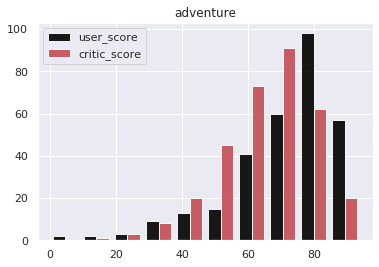

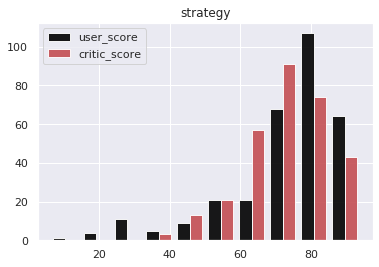

In [105]:
for genre in game_genres:
    genre_hist(genre)

#### Построим общие распределения оценок пользователей и критиков

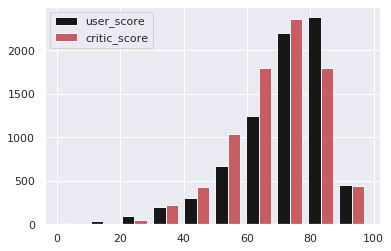

In [61]:
# Для этого нам потребуется домножить оценки пользователей на *10, чтобы мы смогли сравнить распределения.
user_score = games['user_score'] * 10
critic_score = games['critic_score']
colors = ['black', 'r']

plt.hist([user_score, critic_score], color = colors, alpha=.9, label = ['user_score', 'critic_score'])
plt.legend()

Распределения оценок пользователей и критиков симметричны и оба смещены влево.
Это означает, что в нашем датасете куда меньше игр с оценками критиков > 80 и оценками пользователей > 8.

## Шаг 6. Проверим гипотезы.

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.
Пороговое значение alpha зададим самостоятельно. 
Поясним:
    - Как мы сформулировали нулевую и альтернативную гипотезы;
    - Какой критерий применили для проверки гипотез и почему.

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевые гипотезы:

- Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [62]:
# Сохраним в переменных xbox_hyp и pc_hyp соответствующие данные (актуальные данные за последние 10 лет)
xone_hyp = games[(games['platform']=='xone') & (games['year_of_release']>2006)]['user_score']
pc_hyp = games[(games['platform']=='pc') & (games['year_of_release']>2006)]['user_score']

#Посчитаем средний рейтинг пользователя для xbox платформ
xone_hyp.mean()

6.521428571428572

In [63]:
#Посчитаем средний рейтинг пользователя для PC платформ
pc_hyp.mean()

6.773024054982817

In [107]:
# Произведем проверку дисперсии выборок
np.var(games[games['platform']=='xone']['user_score'])

1.8965188383045526

In [109]:
np.var(games[games['platform']=='pc']['user_score'])

2.3377471580367684

In [64]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .01

results = st.ttest_ind(xone_hyp.dropna(), pc_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.037253715630861925
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Значение p-value равно чуть меньше 4%. Таким образом, не получилось опровергнуть Нулевую гипотезу. То есть, нам нужно раздвинуть доверительный интервал на 3.7%, чтобы можно было получить различность рейтингов двух платформ.

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформулируем нулевые гипотезы:

- Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [65]:
# Сохраним в переменных genre_action_hyp и genre_sports_hyp соответствующие данные с пользовательскими оценками
genre_action_hyp = games[(games['genre']=='action') & (games['year_of_release']>2006)]['user_score']
genre_sports_hyp = games[(games['genre']=='sports') & (games['year_of_release']>2006)]['user_score']

#выведем среднюю оценку по жанру экшн
genre_action_hyp.mean()

6.839204545454545

In [66]:
#выведем среднюю оценку по жанру спорт
genre_sports_hyp.mean()

6.3086294416243645

In [110]:
# Произведем проверку дисперсии выборок
np.var(games[games['genre']=='action']['user_score'])

2.0306366538266296

In [111]:
np.var(games[games['genre']=='sports']['user_score'])

2.5941606711770175

In [67]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .01

results = st.ttest_ind(genre_action_hyp.dropna(), genre_sports_hyp.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.064098789244688e-11
Отвергаем нулевую гипотезу


**Вывод:** Получив p-value, мы отвергли Нулевую гипотезу. Таким образом, у нас практически нет вероятности получить одинакове средние рейнтинги по двум жанрам. 

### Вывод по проверке гипотез

Проверили гипотезы по функции ttest_ind, вычисляющей t-тест двух независимых выборок:
- Гипотеза: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Нулевую гипотезу не удалось опровергнуть.
- Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные". Отвергаем нулевую гипотезу.

## Шаг 7. Общий вывод

Перед анализом данных мы подготовили наши данные, привели к правильным данным столбцы, привели к нижнему регистру таблицы и сами названия колонок. Привели к правильным типам данных необходимые столбцы.
Определили, что аббревиатура **TBD** значит *to be determined, to be done*. То есть, данные были нарочно не заполнены. Поэтому заменили tbd на nan для проведения дальнейшего анализа.
Проведя анализ, мы выявили, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х до 2008 года. С 2008 года после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок консольных игр.
За весь период консольных приставок самые популярные оказались: *PS2, X360, PS3, WII, DS, PS*.
Также мы выявили, что средняя продолжительность жизни игровой приставки составляет порядка 10 лет. Самый пик продаж наступает примерно через 5 лет после выпуска консоли.
У платформ лидеров наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки не играют значимой роли. Это значит, что для людей мнение критиков важнее мнения других пользователей.
Самый популярный жанр за последние 10 лет: *'Action'*. Якорем висит жанр *'Strategy'*.

После мы составили портреты пользователей каждого региона за все года.
- Самые популярные игровые платформы в *Северной Америке* это: *XBOX, PS2, WII, PS3, DS*. Топ 5 жанров в северной америке : *action, sports, shooter, platform, misc*. По рейтингам видно, что больше всего продаж у игр с рейтингом *"для всех"*, на втором месте игры с рейтингом *"от 13 и выше"* и на третьем месте игры с рейтингом *"от 17 и выше"*.

- Самые популярные игровые платформы в *Европе* это: *PS2, PS3, XBOX, WII, PS*. Топ 5 жанров в Европе : *action, sports, shooter, racing, misc*. По рейтингам видно, что больше всего продаж у игр с рейтингом *"для всех"*, на втором месте игры с рейтингом *"от 17 и выше"* и на третьем месте игры с рейтингом *"от 13 и выше"*.

- Самые популярные игровые платформы в *Японии* это: *DS, PS, PS2, SNES, 3DS*. Топ 5 жанров в Японии : *Role-Playing, action, sports, platform, misc*. По рейтингам видно, что больше всего продаж у игр с рейтингом *"для всех"*, на втором месте игры с рейтингом *"от 13 и выше"* и на третьем месте игры с рейтингом *"от 17 и выше"*.

Если брать данные за последний год (2016):\
То в **Северной Америке**:
- Топ игровых платформ выглядит так: *PS4, Xone, DS3*;
- Топ Жанров игр: *Shooter, Action, Sports*;
- Топ Рейтингов игр: *"От 17 и выше" , "от 13 и выше" и "для всех"*.

В **Европейском Союзе**:
- Топ игровых платформ : *PS4, Xone, PC*;
- Топ жанров: *Shooter, Sports, Action*;
- Топ рейтингов: *"От 17 и выше", "для всех", "от 13 и выше"*.

В **Японии**:
- Топ игровых платформ : *3DS, PS4, PSV*;
- Топ жанров: *Action, Role-playing, Adventure*;
- Топ рейтингов: *"От 13 и выше", "от 17 и выше", "для всех"*.

Для прогноза будущих продаж лучше брать данные за последний год, так как технологии стремительно развиваются, а вкусы людей могут меняться очень быстро. Соответственно, для 2017 года большую часть прибыли будут приносить игры жанра Shooter, для платформы PS4 и с рейтингом от 17 и выше. На втором месте по продажам разместятся игры жанра Sports, для платформы PS4 и с рейтингом "для всех". И замкнут тройку лидеров тоже игры жанра Shooter с тем же рейтингом от 17 и выше, но уже для платформы XOne.